In [319]:
import pandas as pd
import regex as re

In [384]:
data1 = pd.read_fwf('local-exp-gl2-data.txt', skiprows=[1])
data2 = pd.read_fwf('local-exp-gl6-data.txt', skiprows=[1])
data = pd.concat([data1, data2])
data

,JobID,JobName,Cluster,NodeList,State,Start,End,ConsumedEnergy,AveRSS,AveDiskRead,AveDiskWrite,AveVMSize,Elapsed,NCPUS,Unnamed: 3
0,42781,dpp-local-nc2_gl2-2.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-25T03:43:16,2023-11-25T05:45:37,NaN,NaN,NaN,NaN,NaN,02:02:21,2,NaN
1,42781.batch,batch,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-25T03:43:16,2023-11-25T05:45:37,245.59K,383316K,5345.30M,802.22M,9676696K,02:02:21,2,NaN
2,42784,daa-local-nc2_gl2-8.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-25T05:50:40,2023-11-26T11:01:52,NaN,NaN,NaN,NaN,NaN,1-05:11:12,2,NaN
3,42784.batch,batch,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-25T05:50:40,2023-11-26T11:01:52,3.99M,729940K,88381.86M,12728.67M,10106308K,1-05:11:12,2,NaN
4,42787,daa-local-nc2_gl2-1.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-26T11:06:56,2023-11-27T16:07:04,NaN,NaN,NaN,NaN,NaN,1-05:00:08,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,43249,dpp-local-nc32_gl6-10.cfg,gl2_gl4,assigned,PENDING,Unknown,Unknown,0,NaN,NaN,NaN,NaN,00:00:00,32,None
109,43252,daa-local-nc16_gl6-9.cfg,gl2_gl4,assigned,PENDING,Unknown,Unknown,0,NaN,NaN,NaN,NaN,00:00:00,16,None
110,43255,daa-local-nc2_gl6-2.cfg,gl2_gl4,assigned,PENDING,Unknown,Unknown,0,NaN,NaN,NaN,NaN,00:00:00,2,None
111,43258,daa-local-nc2_gl6-1.cfg,gl2_gl4,assigned,PENDING,Unknown,Unknown,0,NaN,NaN,NaN,NaN,00:00:00,2,None


In [385]:
def convert_to_numeric(value):
    match = re.match(r'^([\d.]+)([KkMm])$', value)
    if match:
        numeric_part = float(match.group(1))
        multiplier = match.group(2).upper()

        if multiplier == 'K':
            return numeric_part * 1000
        elif multiplier == 'M':
            return numeric_part * 1000000

    return value


def convert_elapsed_time(elapsed_time):
    parts = elapsed_time.split('-') if '-' in elapsed_time else [0, elapsed_time]
    days = int(parts[0])
    time_parts = parts[1].split(':')
    hours = int(time_parts[0])
    minutes = int(time_parts[1])
    seconds = int(time_parts[2])
    total_seconds = days * 24 * 3600 + hours * 3600 + minutes * 60 + seconds
    return total_seconds


data = data[data.State == 'COMPLETED']
data.JobName = data.JobName.replace('batch', method='ffill')
data = data.dropna(subset=['ConsumedEnergy'])
data = data.drop('Unnamed: 3', axis=1)
data = data[~data.JobName.str.contains("nc2")].reset_index(drop=True)
data[['Workflow', 'mode', 'ncores', 'node', 'trial']] = data.JobName.str.extract(
    r'(\w+)-(\w+)-nc(\d+)_(gl\d+)-(\d+).cfg')
data.ncores = data.ncores.astype(int)
data.trial = data.trial.astype(int)

for column in ['ConsumedEnergy', 'AveRSS', 'AveDiskRead', 'AveDiskWrite', 'AveVMSize']:
    data[column] = data[column].apply(convert_to_numeric)
    data[f"{column}K"] = data[column] / 1000
    data[f"{column}M"] = data[column] / 1000000

data['ElapsedSeconds'] = data.Elapsed.apply(convert_elapsed_time)
data['ElapsedMinutes'] = data.ElapsedSeconds / 60
data['ElapsedHours'] = data.ElapsedMinutes / 60

data = data.sort_values(by=['ncores', 'Workflow'])
data

C:\Users\Dmitrijs\AppData\Local\Temp\ipykernel_9528\2895311873.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.JobName = data.JobName.replace('batch', method='ffill')


,JobID,JobName,Cluster,NodeList,State,Start,End,ConsumedEnergy,AveRSS,AveDiskRead,...,AveRSSM,AveDiskReadK,AveDiskReadM,AveDiskWriteK,AveDiskWriteM,AveVMSizeK,AveVMSizeM,ElapsedSeconds,ElapsedMinutes,ElapsedHours
0,42790.batch,dpp-local-nc4_gl2-9.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-27T16:12:08,2023-11-27T17:18:50,195420.0,6.272080e+08,5.345300e+09,...,627.208,5345300.0,5345.30,802220.0,802.22,18555572.0,18555.572,4002,66.700000,1.111667
1,42793.batch,dpp-local-nc4_gl2-3.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-27T17:23:51,2023-11-27T18:31:05,196130.0,6.302840e+08,5.345300e+09,...,630.284,5345300.0,5345.30,802230.0,802.23,18611692.0,18611.692,4034,67.233333,1.120556
2,42802.batch,dpp-local-nc4_gl2-2.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T13:24:15,2023-11-29T14:33:08,197030.0,6.297400e+08,5.345300e+09,...,629.740,5345300.0,5345.30,802600.0,802.60,18558724.0,18558.724,4133,68.883333,1.148056
4,42808.batch,dpp-local-nc4_gl2-10.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T15:37:32,2023-11-29T16:46:21,196800.0,6.273480e+08,5.345420e+09,...,627.348,5345420.0,5345.42,802720.0,802.72,18555848.0,18555.848,4129,68.816667,1.146944
9,42970.batch,dpp-local-nc4_gl6-6.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T14:08:03,2023-11-25T15:20:30,511620.0,6.578880e+08,5.345220e+09,...,657.888,5345220.0,5345.22,804960.0,804.96,26437380.0,26437.380,4347,72.450000,1.207500
6,42817.batch,daa-local-nc8_gl2-2.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T19:56:50,2023-11-30T08:55:49,2730000.0,2.128184e+09,8.838194e+10,...,2128.184,88381940.0,88381.94,12728800.0,12728.80,37932884.0,37932.884,46739,778.983333,12.983056
13,42982.batch,daa-local-nc8_gl6-8.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T22:23:06,2023-11-26T08:07:27,4700000.0,2.608084e+09,8.835436e+10,...,2608.084,88354360.0,88354.36,12748230.0,12748.23,52562824.0,52562.824,35061,584.350000,9.739167
3,42805.batch,dpp-local-nc8_gl2-4.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T14:38:13,2023-11-29T15:32:28,185840.0,1.126708e+09,5.345410e+09,...,1126.708,5345410.0,5345.41,802710.0,802.71,36357232.0,36357.232,3255,54.250000,0.904167
5,42814.batch,dpp-local-nc8_gl2-10.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T18:58:28,2023-11-29T19:51:46,185290.0,1.123180e+09,5.345310e+09,...,1123.180,5345310.0,5345.31,802230.0,802.23,36324804.0,36324.804,3198,53.300000,0.888333
7,42964.batch,daa-local-nc16_gl6-3.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T03:30:50,2023-11-25T09:21:34,3150000.0,4.874676e+09,8.837866e+10,...,4874.676,88378660.0,88378.66,12751540.0,12751.54,102386892.0,102386.892,21044,350.733333,5.845556


In [386]:
# All collected data
data.groupby(['Workflow', 'mode', 'ncores', 'node']).size().reset_index(name='count').sort_values(
    by=['Workflow', "node", "ncores"])

,Workflow,mode,ncores,node,count
0,daa,local,8,gl2,1
1,daa,local,8,gl6,1
2,daa,local,16,gl6,2
3,daa,local,32,gl6,2
4,dpp,local,4,gl2,4
6,dpp,local,8,gl2,2
5,dpp,local,4,gl6,1
7,dpp,local,16,gl6,2


In [387]:
mask = (data.groupby(['Workflow', 'mode', 'ncores', 'node']).size()).reset_index(name='count')
mask['count_threshold'] = mask['count'] > 1
mask = mask[mask.count_threshold]
mask

,Workflow,mode,ncores,node,count,count_threshold
2,daa,local,16,gl6,2,True
3,daa,local,32,gl6,2,True
4,dpp,local,4,gl2,4,True
6,dpp,local,8,gl2,2,True
7,dpp,local,16,gl6,2,True


In [388]:
mask.drop(['count', 'count_threshold'], axis=1, inplace=True)
data = data.merge(mask, on=['Workflow', 'mode', 'ncores', 'node'], how='inner')
data

,JobID,JobName,Cluster,NodeList,State,Start,End,ConsumedEnergy,AveRSS,AveDiskRead,...,AveRSSM,AveDiskReadK,AveDiskReadM,AveDiskWriteK,AveDiskWriteM,AveVMSizeK,AveVMSizeM,ElapsedSeconds,ElapsedMinutes,ElapsedHours
0,42790.batch,dpp-local-nc4_gl2-9.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-27T16:12:08,2023-11-27T17:18:50,195420.0,6.272080e+08,5.345300e+09,...,627.208,5345300.0,5345.30,802220.0,802.22,18555572.0,18555.572,4002,66.700000,1.111667
1,42793.batch,dpp-local-nc4_gl2-3.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-27T17:23:51,2023-11-27T18:31:05,196130.0,6.302840e+08,5.345300e+09,...,630.284,5345300.0,5345.30,802230.0,802.23,18611692.0,18611.692,4034,67.233333,1.120556
2,42802.batch,dpp-local-nc4_gl2-2.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T13:24:15,2023-11-29T14:33:08,197030.0,6.297400e+08,5.345300e+09,...,629.740,5345300.0,5345.30,802600.0,802.60,18558724.0,18558.724,4133,68.883333,1.148056
3,42808.batch,dpp-local-nc4_gl2-10.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T15:37:32,2023-11-29T16:46:21,196800.0,6.273480e+08,5.345420e+09,...,627.348,5345420.0,5345.42,802720.0,802.72,18555848.0,18555.848,4129,68.816667,1.146944
4,42805.batch,dpp-local-nc8_gl2-4.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T14:38:13,2023-11-29T15:32:28,185840.0,1.126708e+09,5.345410e+09,...,1126.708,5345410.0,5345.41,802710.0,802.71,36357232.0,36357.232,3255,54.250000,0.904167
5,42814.batch,dpp-local-nc8_gl2-10.cfg,gl2_gl4,GreenLab-STF,COMPLETED,2023-11-29T18:58:28,2023-11-29T19:51:46,185290.0,1.123180e+09,5.345310e+09,...,1123.180,5345310.0,5345.31,802230.0,802.23,36324804.0,36324.804,3198,53.300000,0.888333
6,42964.batch,daa-local-nc16_gl6-3.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T03:30:50,2023-11-25T09:21:34,3150000.0,4.874676e+09,8.837866e+10,...,4874.676,88378660.0,88378.66,12751540.0,12751.54,102386892.0,102386.892,21044,350.733333,5.845556
7,42973.batch,daa-local-nc16_gl6-10.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T15:25:35,2023-11-25T21:16:11,3170000.0,4.883076e+09,8.835444e+10,...,4883.076,88354440.0,88354.44,12748310.0,12748.31,102385240.0,102385.240,21036,350.600000,5.843333
8,42976.batch,dpp-local-nc16_gl6-10.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T21:21:16,2023-11-25T21:47:14,222220.0,2.199092e+09,5.345230e+09,...,2199.092,5345230.0,5345.23,804970.0,804.97,98673080.0,98673.080,1558,25.966667,0.432778
9,42979.batch,dpp-local-nc16_gl6-7.cfg,gl2_gl4,gl6,COMPLETED,2023-11-25T21:52:18,2023-11-25T22:18:02,222130.0,2.193944e+09,5.345240e+09,...,2193.944,5345240.0,5345.24,805050.0,805.05,98625236.0,98625.236,1544,25.733333,0.428889


In [389]:
import matplotlib.pyplot as plt

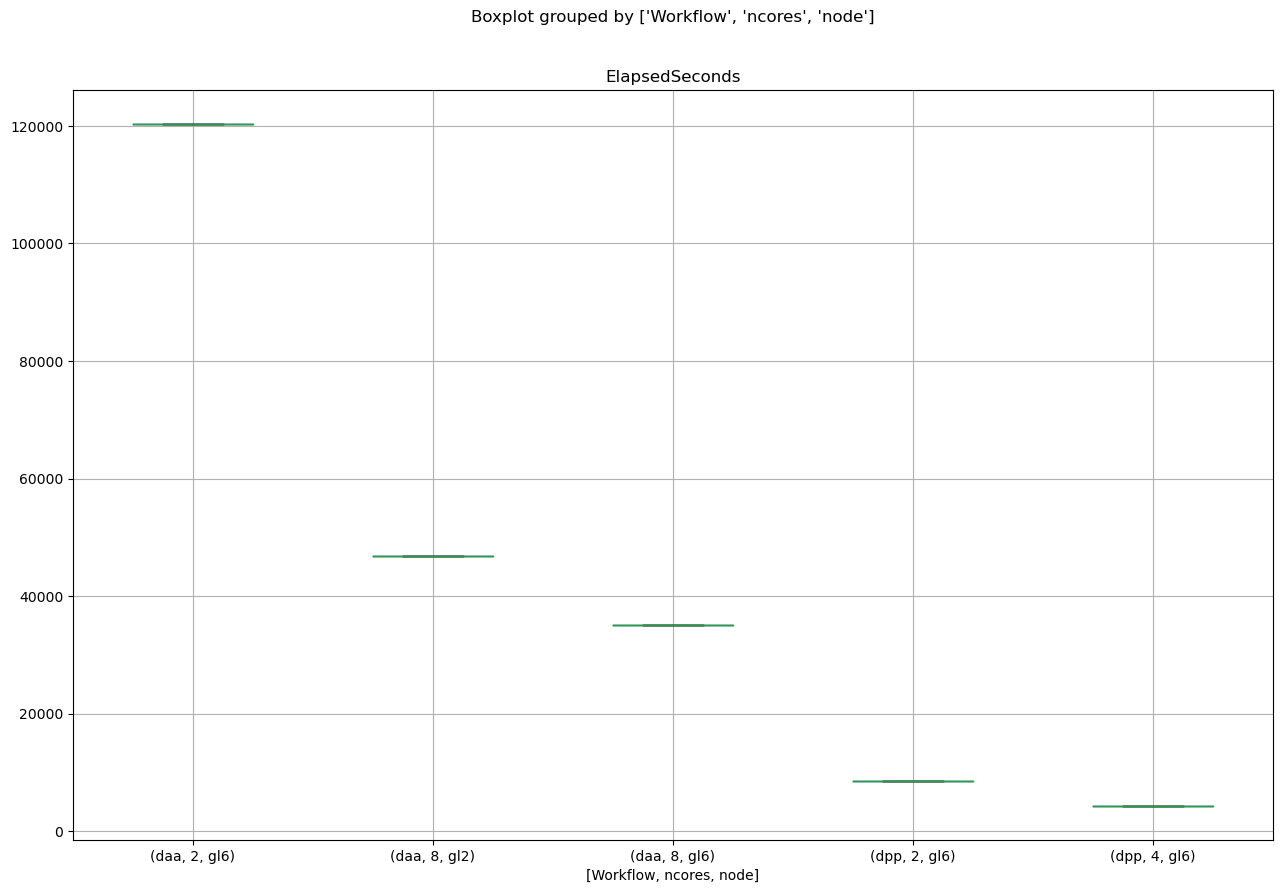

In [291]:
# draw one plot containing multiple boxplots with data distribution curve for each (workflow,ncores,node) agains EnergyConsumption
fig, ax = plt.subplots(figsize=(15, 10))
data.boxplot(column='ElapsedSeconds', by=['Workflow', 'ncores', 'node'], ax=ax)
plt.show()
# save
fig.savefig('boxplot.png')


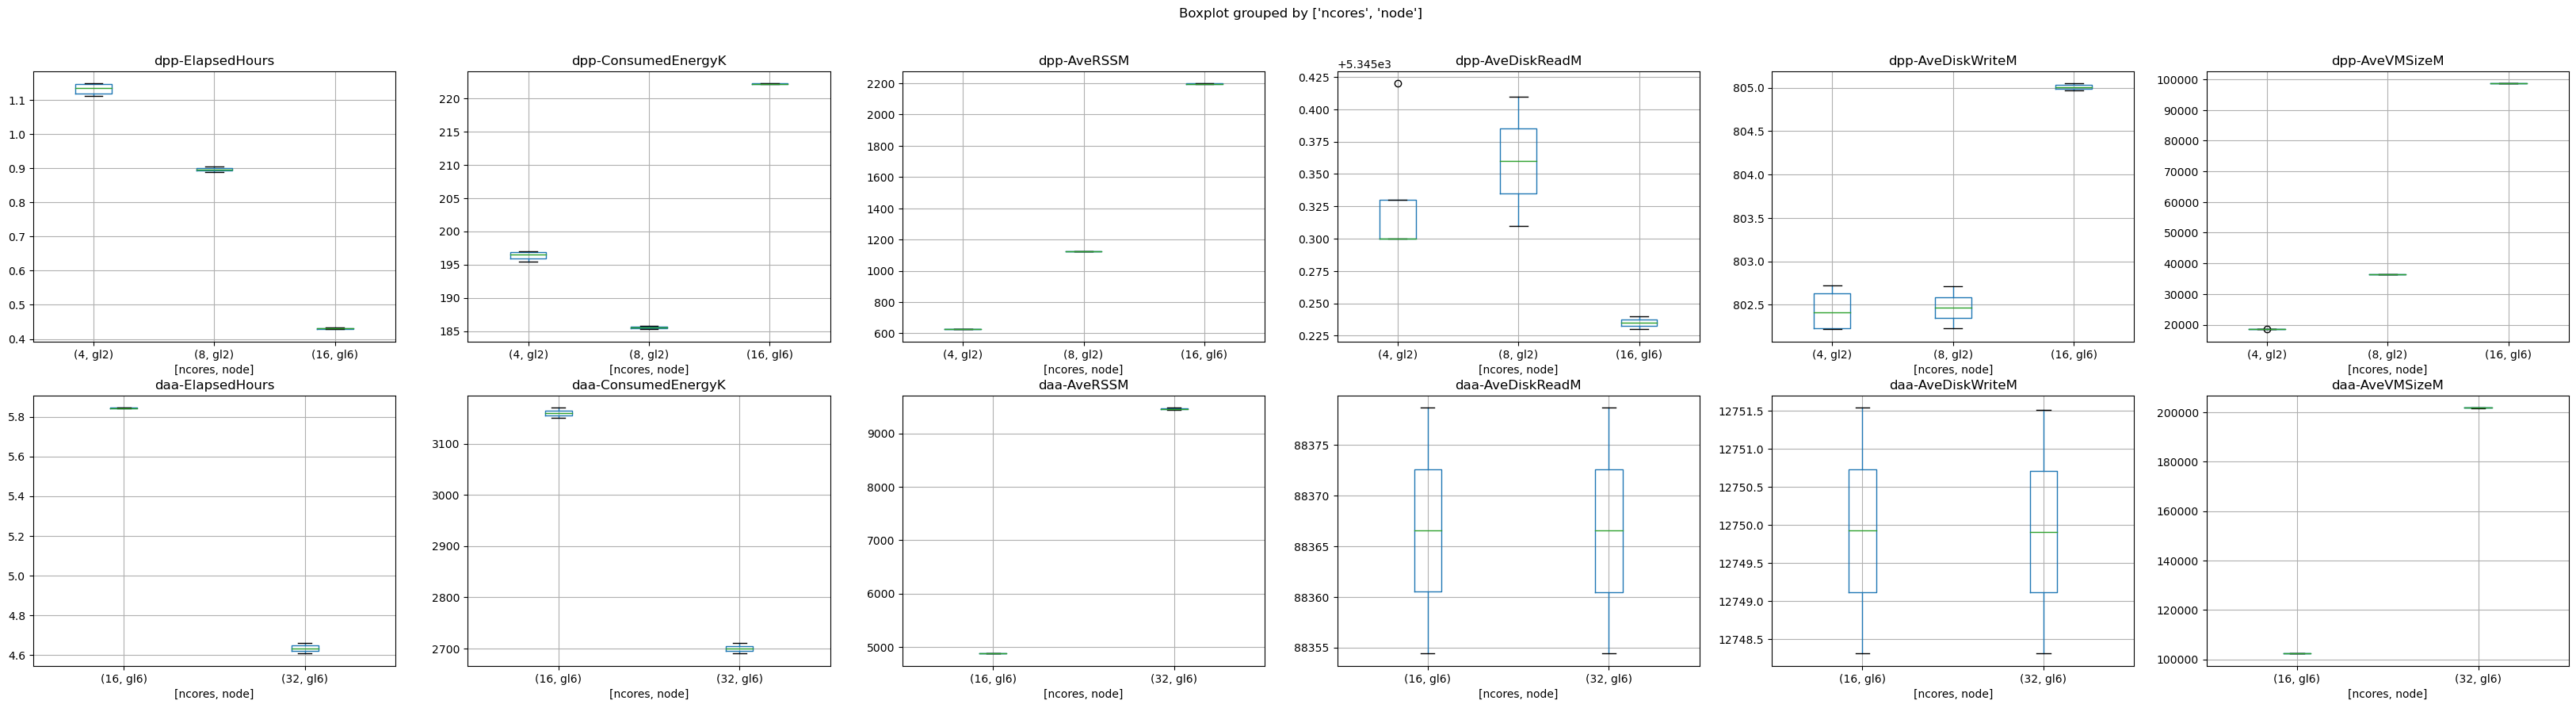

In [394]:
# draw two plots based on workflow containing multiple boxplots with data distribution curve for each (ncores,node) agains ConsumedEnergy, then 2 plots agains AveRSS, AveDiskRead, AveDiskWrite, AveVMSize. Add titles to plots with workflow name. Make sure that it is one big plot that contains all the subplots.
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(40, 10))
for j, workflow in enumerate(data.Workflow.unique()):
    for i, column in enumerate(
            ['ElapsedHours', 'ConsumedEnergyK', 'AveRSSM', 'AveDiskReadM', 'AveDiskWriteM', 'AveVMSizeM']):
        data[data.Workflow == workflow].boxplot(column=column, by=['ncores', 'node'], ax=ax[j, i])
        ax[j, i].set_title(f"{workflow}-{column}")
        # next to every boxplot box show data distribution

fig.savefig('boxplot-overview-by-workflows.png')

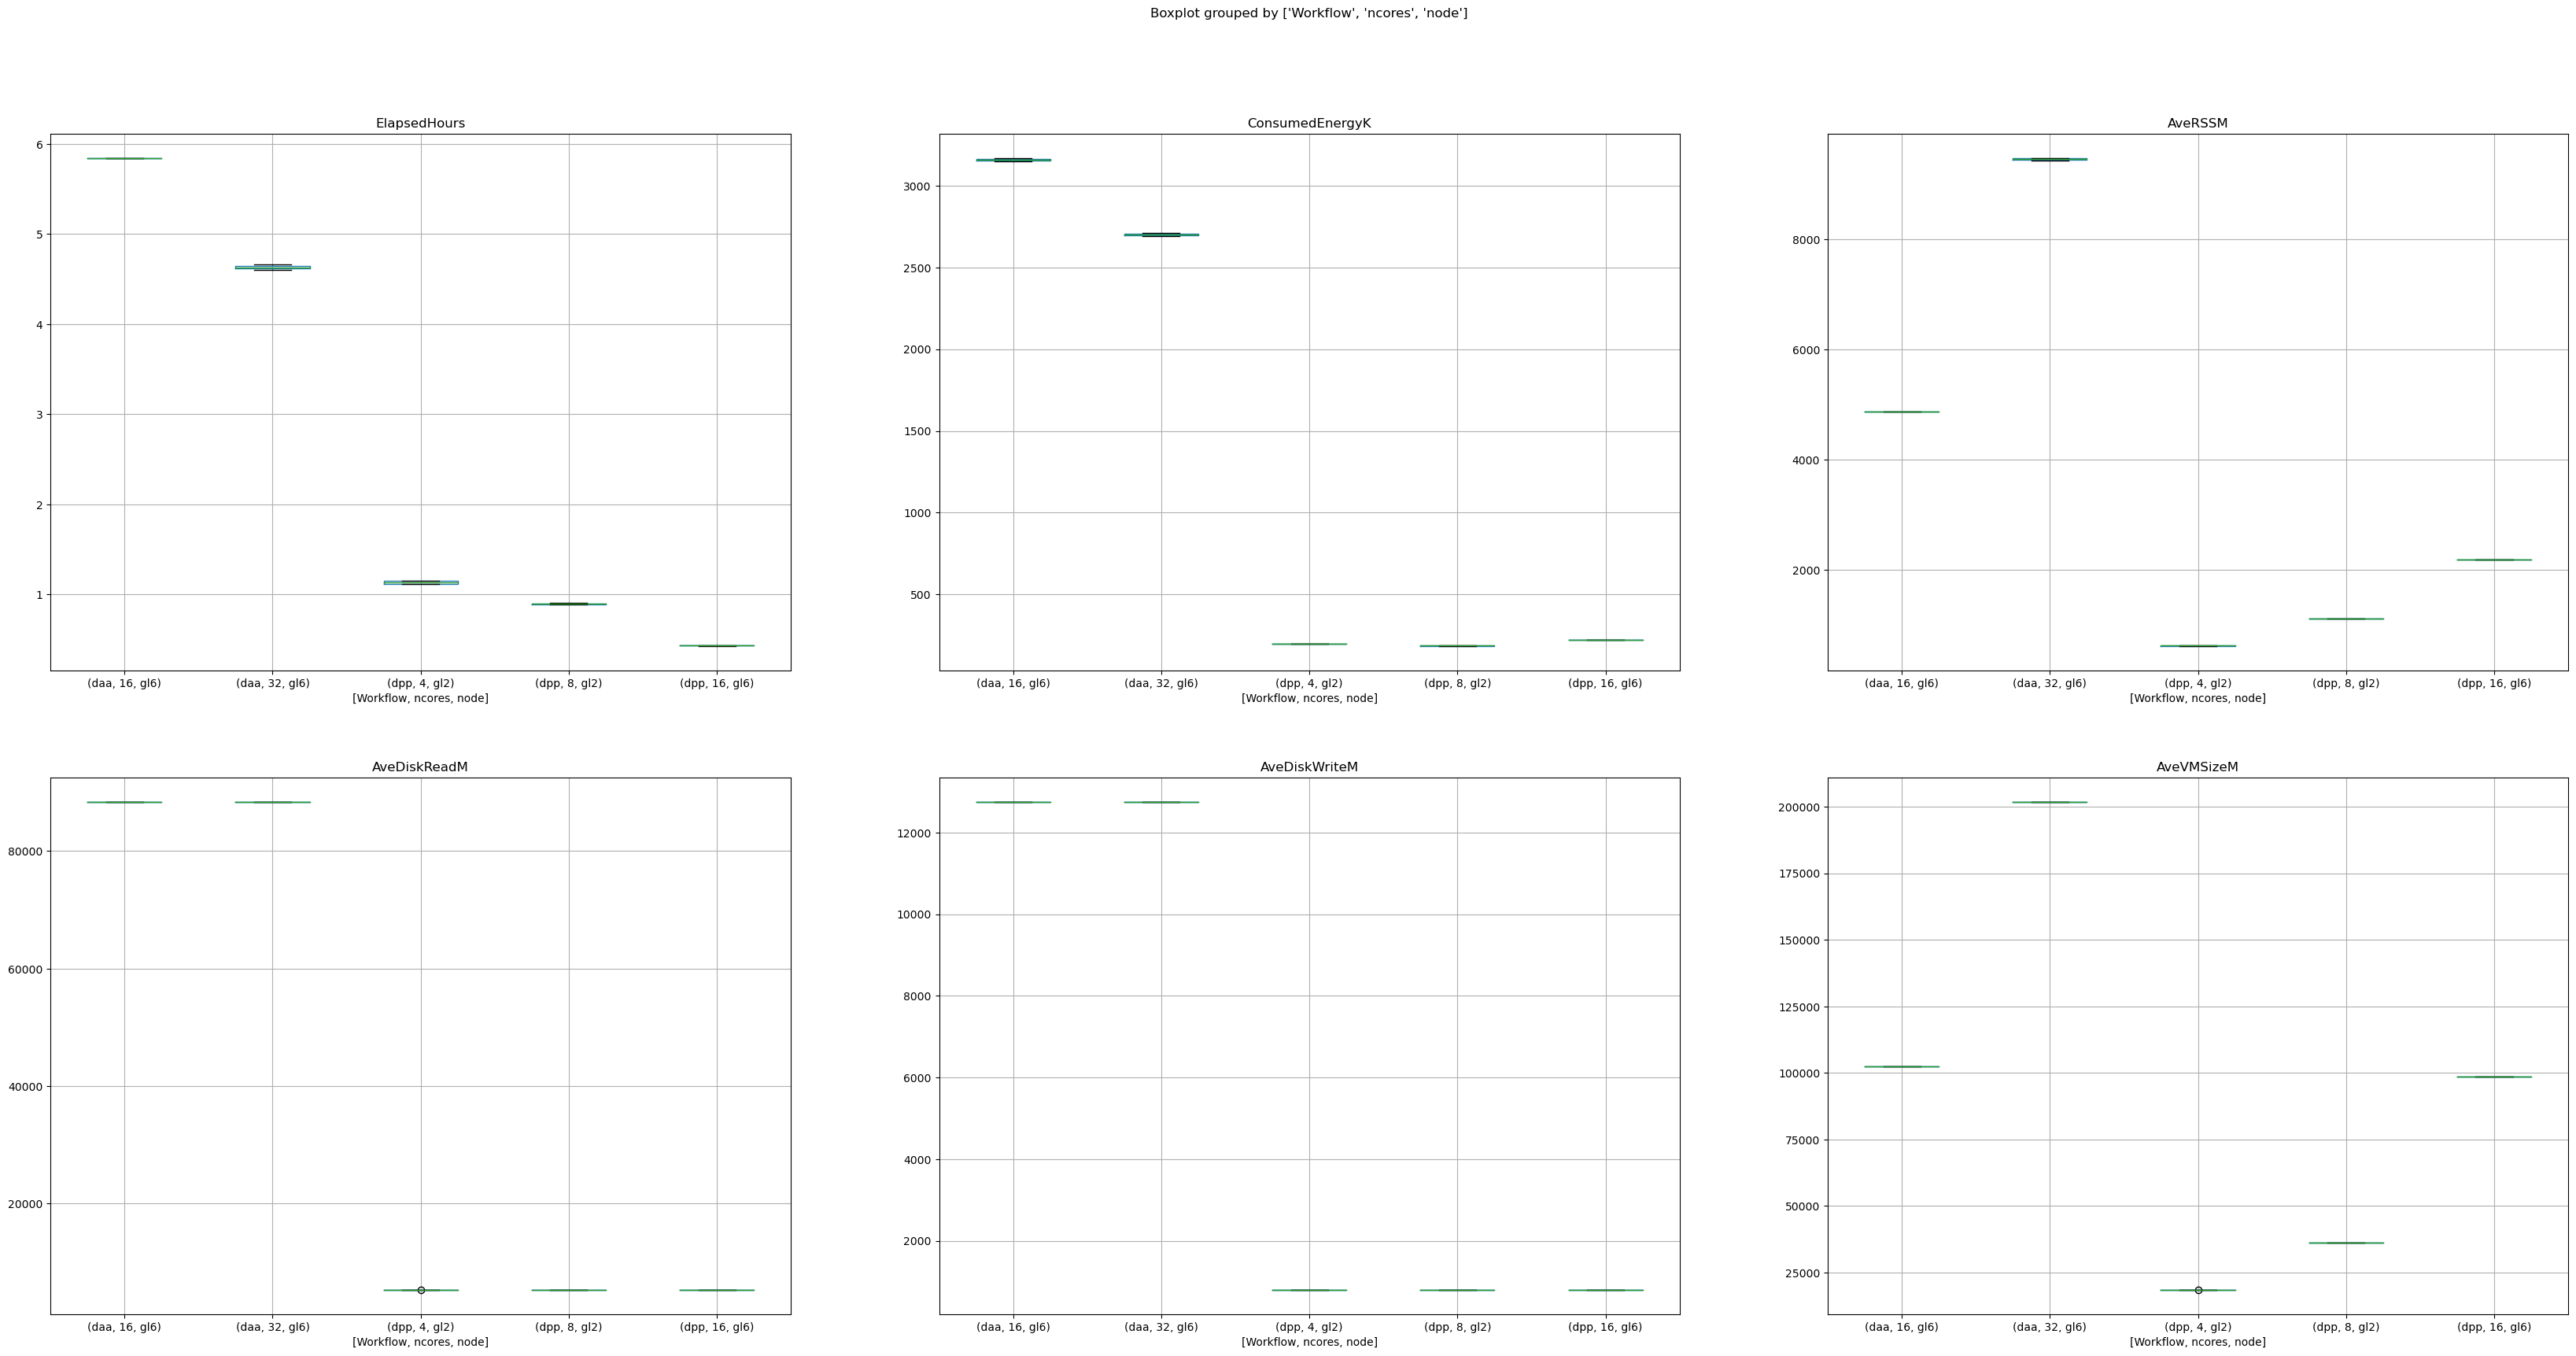

In [395]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(40, 20))
for i, column in enumerate(
        ['ElapsedHours', 'ConsumedEnergyK', 'AveRSSM', 'AveDiskReadM', 'AveDiskWriteM', 'AveVMSizeM']):
    data.boxplot(column=column, by=['Workflow', 'ncores', 'node'], ax=ax[i // 3, i % 3])
    ax[i // 3, i % 3].set_title(column)

fig.savefig('boxplot-overview.png')